In [1]:
import tensorflow as tf
print(tf.__version__)

In [4]:
#load the Fashion MNIST Dataset
fmnist=tf.keras.datasets.fashion_mnist
# Api of keres
print(fmnist)

<module 'keras.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/datasets/fashion_mnist/__init__.py'>


In [5]:
# Load the traning and test split of fashion MNIST dataset
(training_images,training_labels),(test_images,test_labels)=fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
training_images.shape,test_images.shape,training_labels.shape,test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

LABEL: 5

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   4   3   0   0   0  35  22  14  28 117 206   0   0   3   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0  31 149 180 212 206 244 209 216 194   0   0   3   0]
 [  0   0   0   0   0   0   0   0   0   1   0   5   0  98 157 183 160 224 228 227 233 233 235 187 114   0   5   0]
 [  0   0   0   0   0   0   0   0   0   1   0   5   0 184 255 219 132 222 236 233 231 227 188 224 167   0   5   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0 173 184 192 208 175 172 162 181 108 199 158   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 

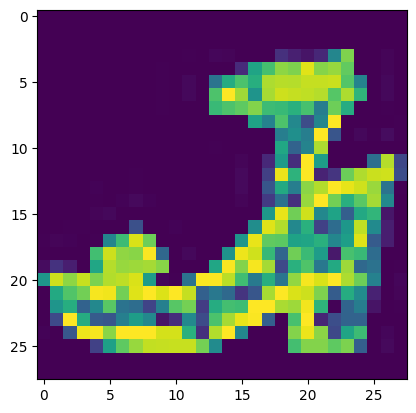

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# You can put input between 0 to 5999    # this is the traing labels upto 60k
index=60

# set number of character per row when spliting
np.set_printoptions(linewidth=320)

# print label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# plot image
plt.imshow(training_images[index])

In [19]:
# Normalize Pixsel values of the train and test image means ham scale karaingay data ko 0 to 1 ki range may
training_images=training_images/255.0
test_images=test_images/255.0

In [23]:
import tensorflow as tf

# Build the Classification Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # Example input shape for images
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
import tensorflow as tf

# Step 1: Sample input logits (before softmax)
logits = [2.0, 1.0, 0.1]   # Example values
print("Logits:", logits)

# Step 2: Convert to TensorFlow tensor
logits_tensor = tf.constant(logits, dtype=tf.float32)

# Step 3: Apply softmax
softmax_output = tf.nn.softmax(logits_tensor)
print("Softmax probabilities:", softmax_output.numpy())

# Step 4: Sum of all softmax values (should be ~1.0)
sum_probs = tf.reduce_sum(softmax_output)
print("Sum of probabilities:", sum_probs.numpy())

# Step 5: Get the index with the highest probability
predicted_class = tf.argmax(softmax_output).numpy()
print("Predicted class index:", predicted_class)


Logits: [2.0, 1.0, 0.1]
Softmax probabilities: [0.6590012  0.24243298 0.09856589]
Sum of probabilities: 1.0000001
Predicted class index: 0


In [26]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # use categorical_crossentropy if labels are one-hot
              metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)

# Print model summary
model.summary()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7787 - loss: 0.6245
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8580 - loss: 0.3936
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8752 - loss: 0.3448
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8834 - loss: 0.3171
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8903 - loss: 0.2972


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [28]:
# Evalute model on unseen dataset
model.evaluate (test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8706 - loss: 0.3605


[0.3624890446662903, 0.870199978351593]